In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
source=pd.read_csv('홈인테리어_addscore.csv')

In [3]:
df=pd.DataFrame(columns=("score","review_len"))

In [4]:
df.head(10)

,score,review_len


In [5]:
df.loc[0]=[source.score[0],source.review_len[0]]

In [6]:
for i in range(0,len(source),1):
    df.loc[i]=[source.score[i],source.review_len[i]]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'kmean plot')

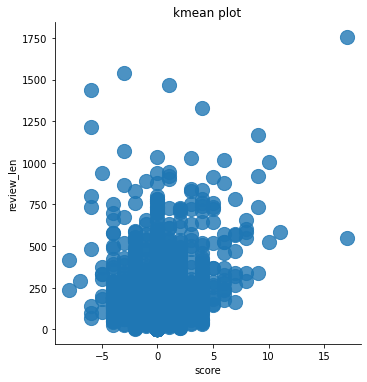

In [7]:
#visualize data point
sns.lmplot('score','review_len', data=source, fit_reg = False, scatter_kws={"s":200})
#title
plt.title('kmean plot')

In [8]:
data_points = df.values

In [9]:
kmeans = KMeans(n_clusters=3).fit(data_points)

In [10]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 0])

In [11]:
df['cluster_id']=kmeans.labels_

In [12]:
df

,score,review_len,cluster_id
0,-1,265,1
1,2,313,1
2,2,313,1
3,-3,334,1
4,-2,279,1
...,...,...,...
4911,0,288,1
4912,-2,271,1
4913,4,204,1
4914,0,217,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'kmean plt ver2')

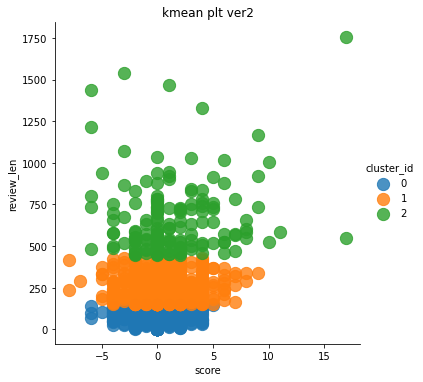

In [13]:
sns.lmplot('score','review_len', data=df, fit_reg=False, scatter_kws={'s':150}, hue="cluster_id")
plt.title('kmean plt ver2')

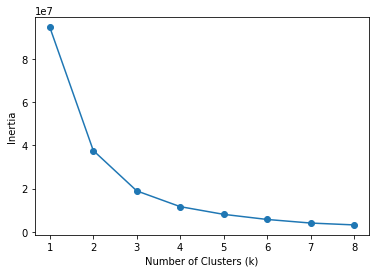

In [20]:
num_clusters = list(range(1, 9))	# K는 1 ~ 8사이의 정수입니다
inertias = []
# 각 K별로 모델을 생성하여 inertia를 측정합니다
for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(df)
    inertias.append(model.inertia_)
# K에 따른 inertia의 변화를 시각화합니다
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()